<a href="https://colab.research.google.com/github/kunal-git-002/face-recognition/blob/master/face_reco_imgs_in_folder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install face_recognition

In [14]:
import face_recognition as fr
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow


In [15]:
#read image and resize it
def read_img(path):
  img=cv2.imread(path)
  (h,w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(h*ratio)

  return cv2.resize(img,(width,height))



  

training process

In [16]:
known_encodings=[]
known_names=[]

known_dir="/content/drive/My Drive/face recognition/datas/known"


for file in os.listdir(known_dir):

  img=read_img(known_dir+"/"+file)

  img_enc=fr.face_encodings(img)[0]
  known_encodings.append(img_enc)

  name=file.split(".")[0]
  known_names.append(name)

  print("____",name,len(img_enc))



____ elon_musk 128
____ jack_maa 128
____ bill_gates 128
____ steve_jobs 128
____ jeff_bezos 128
____ mark_zukerberg 128
____ mukesh-ambani 128
____ lary_page 128
____ ratan_tata 128
____ warren_buffet 128


for single face

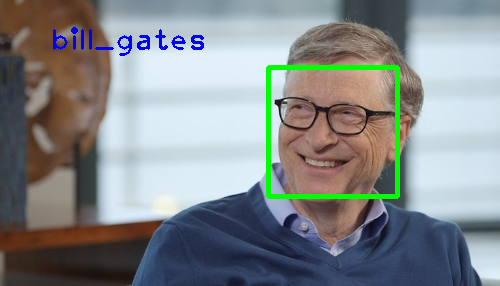

In [17]:

def reco_face(path):
  img=read_img(path)

  y2,x1,y1,x2=fr.face_locations(img)[0]

  img_enc=fr.face_encodings(img)[0]#encoding

  result=fr.compare_faces(known_encodings,img_enc)#face comerison

  if any(result)==True:
    for i,j in enumerate(result):
      if j==True:
        person=known_names[i]
      else:
        pass
  else:
    person="unknown"

  cv2.rectangle(img,
                (x1,y1),
                (x2,y2),
                (0,255,0),
                3)

  font=cv2.FONT_HERSHEY_PLAIN
  cv2.putText(img,
              person,
              (50,50),
              font,
              2,
              (255,0,0),
              2)
  return cv2_imshow(img)
  
path="/content/drive/My Drive/face recognition/datas/unknown/bill_gates2.jpg"

reco_face(path)

for a perticular folder

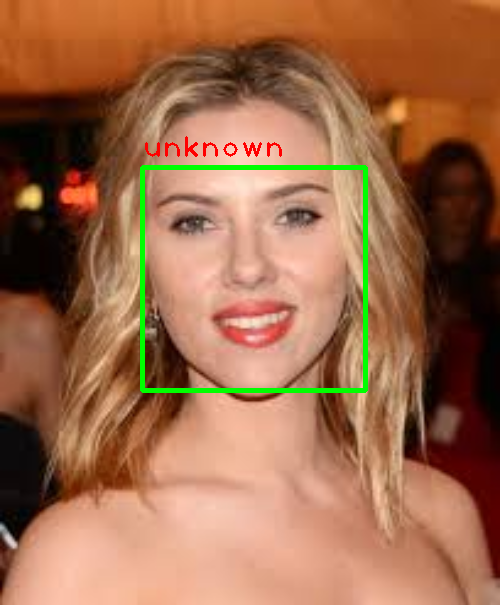

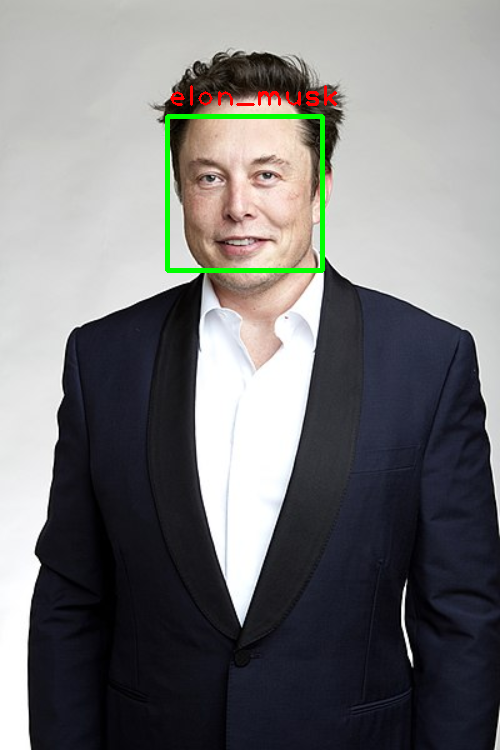

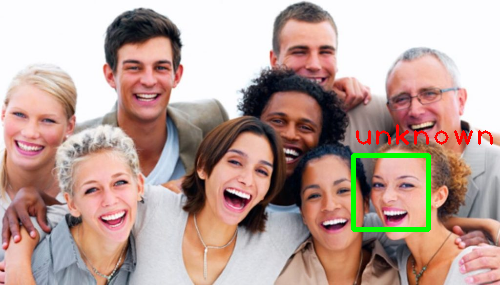

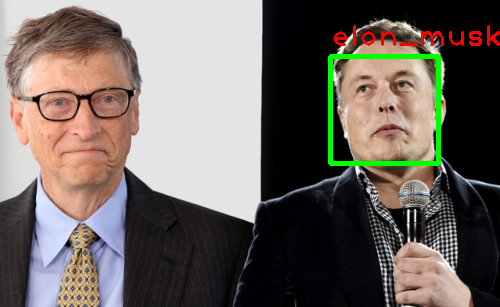

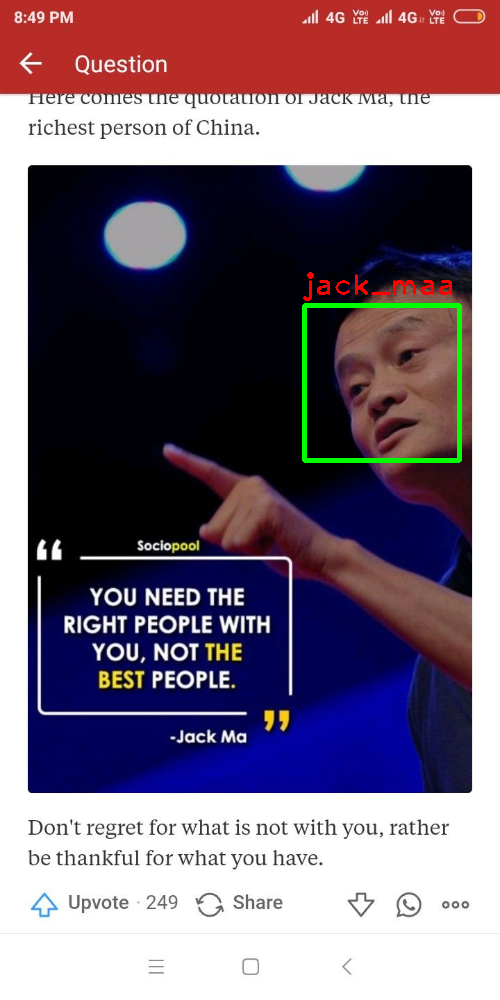

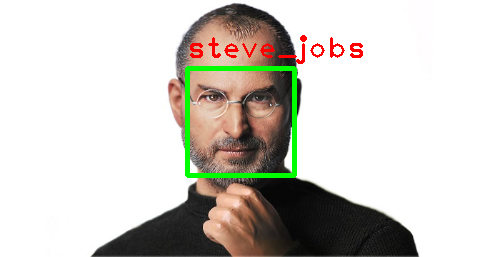

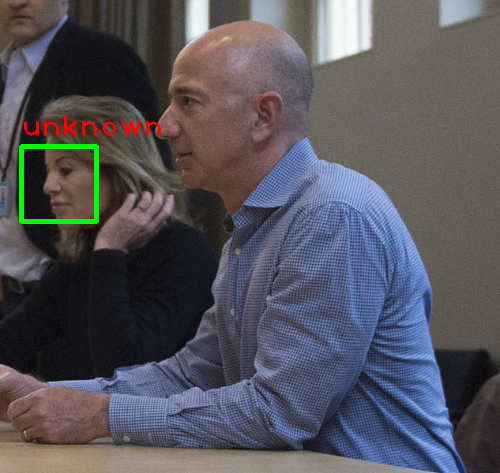

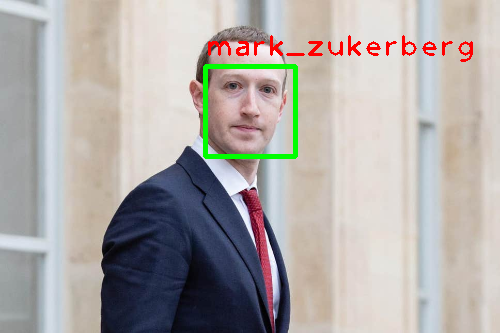

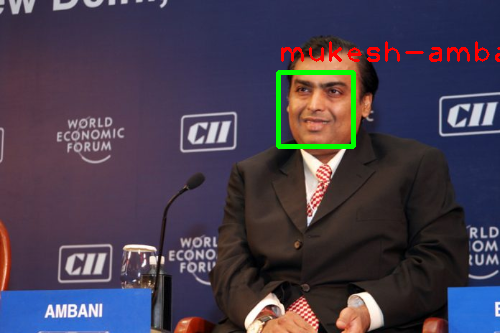

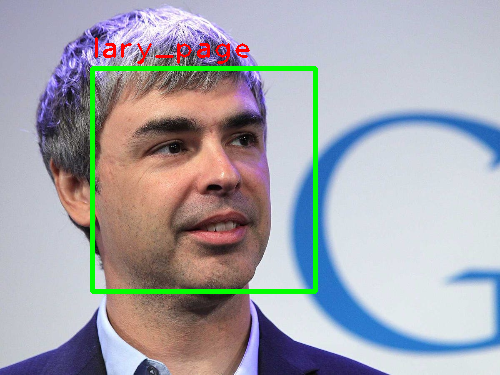

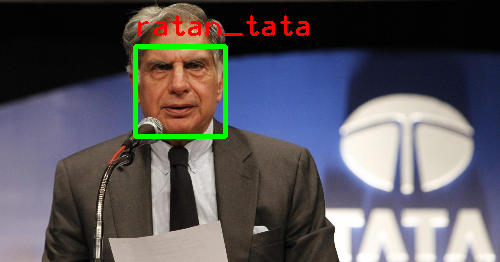

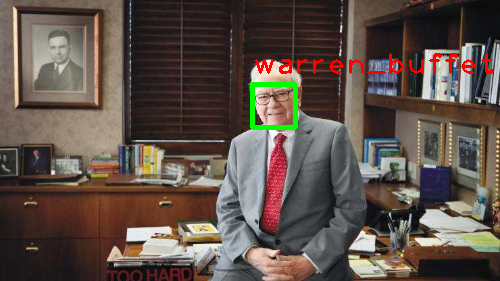

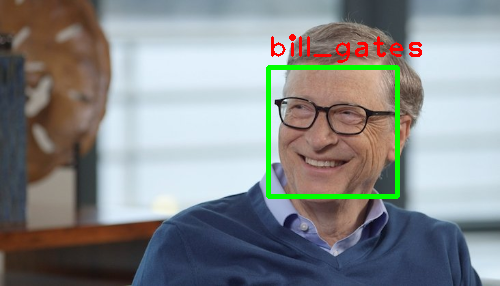

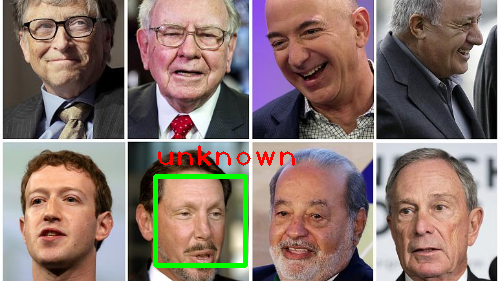

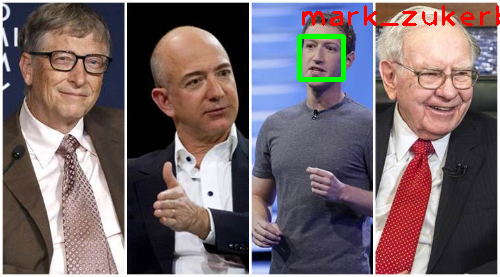

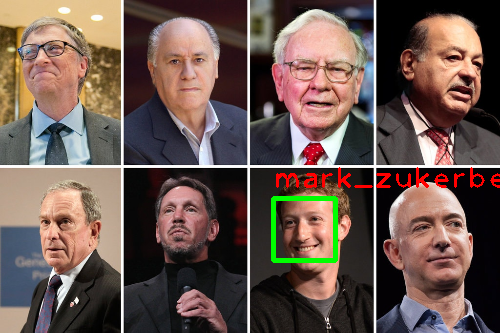

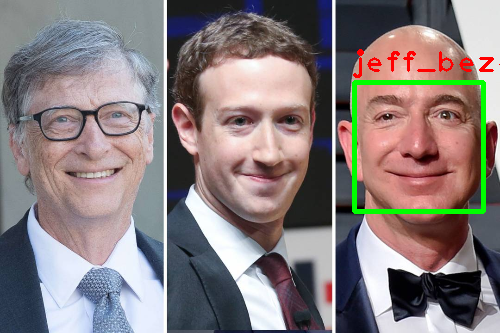

In [18]:
folder_path="/content/drive/My Drive/face recognition/datas/unknown"#location of folder

for item in os.listdir(folder_path):
  img=read_img(folder_path+"/"+item)

  y1,x2,y2,x1=fr.face_locations(img)[0]

  img_enc=fr.face_encodings(img)[0]#encoding

  result=fr.compare_faces(known_encodings,img_enc)#face comerison

  if any(result)==True:
    for i,j in enumerate(result):
      if j==True:
        person=known_names[i]
      else:
        pass
  else:
    person="unknown"

  cv2.rectangle(img,
                (x1,y1),
                (x2,y2),
                (0,255,0),
                3)

  font=cv2.FONT_HERSHEY_PLAIN
  cv2.putText(img,
              person,
              (x1,y1-10),
              font,
              2,
              (0,0,255),
              2)
  cv2_imshow(img)
  
  

